In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
import numpy as np
# from IPython.display import Markdown, display

pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок

## 1. Первичный отсмотр данных

In [30]:
students = pd.read_csv('stud_math.csv')
display(students.head(10))
display(students.info())
len(students)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
school                 395 non-null object
sex                    395 non-null object
age                    395 non-null int64
address                378 non-null object
famsize                368 non-null object
Pstatus                350 non-null object
Medu                   392 non-null float64
Fedu                   371 non-null float64
Mjob                   376 non-null object
Fjob                   359 non-null object
reason                 378 non-null object
guardian               364 non-null object
traveltime             367 non-null float64
studytime              388 non-null float64
failures               373 non-null float64
schoolsup              386 non-null object
famsup                 356 non-null object
paid                   355 non-null object
activities             381 non-null object
nursery                379 non-null object
studytime, granular    388 non-

None

395

Всего 395 учеников  
30 колонок  
13 столбцов - числа  
17 столбцов - строки  
Колонка studytime, granular отсутсвует в описании датасета - удаляем её:

In [31]:
students.drop('studytime, granular', axis=1, inplace=True)

In [32]:
print(students.isna().sum())
print('Всего пустых значений: ', students.isna().sum().sum())

school         0
sex            0
age            0
address       17
famsize       27
Pstatus       45
Medu           3
Fedu          24
Mjob          19
Fjob          36
reason        17
guardian      31
traveltime    28
studytime      7
failures      22
schoolsup      9
famsup        39
paid          40
activities    14
nursery       16
higher        20
internet      34
romantic      31
famrel        27
freetime      11
goout          8
health        15
absences      12
score          6
dtype: int64
Всего пустых значений:  558


## 2. Первичный анализ данных в столбцах

In [33]:
def first_analysis(col, boundaries=None):
    print('Столбец ', col)
    if students.loc[:, col].dtypes == np.dtype('O'):
        #         cacao.bean_type.astype(str).apply(lambda x: None if x.strip() == '' else x)
        students[col] = students[col].astype(str).apply(lambda x: None if x.strip() == ''
                                                        else None if x.strip() == 'nan'
                                                        else x)
        print(pd.DataFrame(students.loc[:, col].value_counts()))
        sns.countplot(students.loc[:, col])
    else:
        fig, ax = plt.subplots()
        students[col].hist(ax=ax)
        students[col].describe()
        ax.set_xlabel(col)
        ax.set_ylabel("Частота (раз)")
        plt.show
        print("\n")
        if boundaries is not None:
            outliers = students[
                ~students[col].between(boundaries[0], boundaries[1]) &
                pd.notnull(students[col])
            ]
            if outliers.shape[0] > 0:
                print("В столбце есть выборсы:")
                display(outliers)

In [34]:
# def first_analysis(dataframe):
#     for col in dataframe:
#         print('Столбец ', col)
#         if dataframe[col].dtypes == 'object':
#             students[col] = students[col].astype(str).apply(lambda x: None if x.strip() == ''
#                                                         else None if x.strip() == 'nan'
#                                                         else x)
#             print(pd.DataFrame(dataframe[col].value_counts()))
#             fig, ax = plt.subplots()
#             sns.countplot(dataframe.loc[:, col], ax=ax)
#         else:
#             dataframe[col].hist()
#             plt.show()
#         print('\n')
#         print('_' * 100)
        
# first_analysis(students)

# def first_analysis(dataframe, col, boundaries=None):
#     print('Столбец ', col)
#     if dataframe[col].dtypes == 'object':
#         fig, ax = plt.subplots()
#         students[col] = students[col].astype(str).apply(lambda x: None if x.strip() == ''
#                                                     else None if x.strip() == 'nan'
#                                                     else x)
#         display(pd.DataFrame(dataframe[col].value_counts()))
#         sns.countplot(students.loc[:, col], ax=ax)
#     else:
#         dataframe[col].hist()
#         plt.show()
#     print('\n')
#     print('_' * 100)
# first_analysis(students, 'school')

# first_analysis(students, 'sex')
# first_analysis(students, 'age')

Столбец  school
    school
GP     349
MS      46


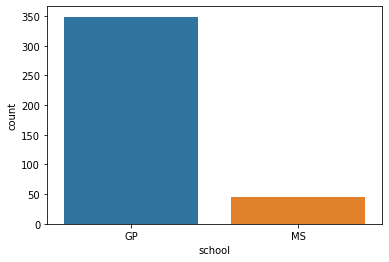

In [35]:
first_analysis('school')

Столбец  sex
   sex
F  208
M  187


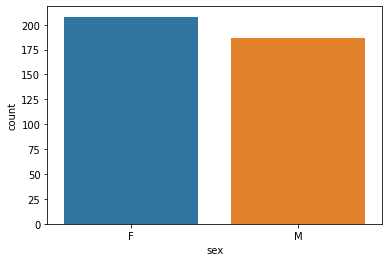

In [36]:
first_analysis('sex')

Столбец  age




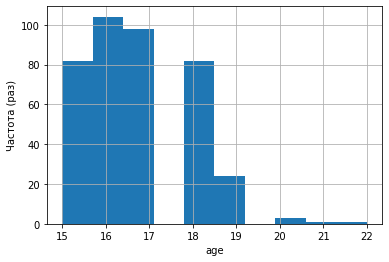

In [37]:
first_analysis('age', boundaries=(15, 22))

Столбец  address
   address
U      295
R       83


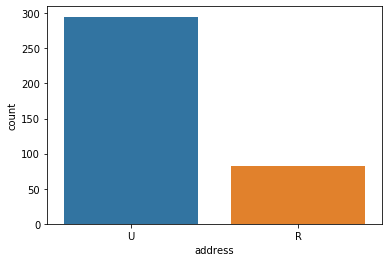

In [38]:
first_analysis('address')

Столбец  famsize
     famsize
GT3      261
LE3      107


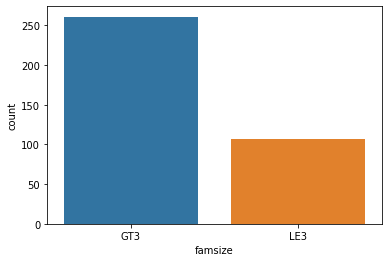

In [39]:
first_analysis('famsize')

Столбец  Pstatus
   Pstatus
T      314
A       36


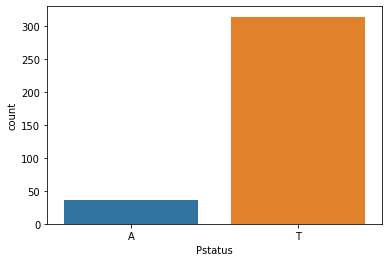

In [40]:
first_analysis('Pstatus')

Столбец  Medu




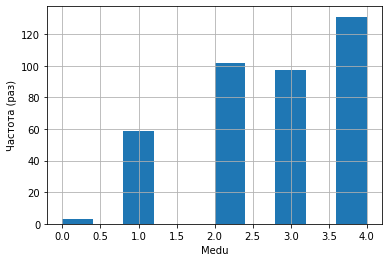

In [41]:
first_analysis('Medu', boundaries=(0, 4))

Столбец  Fedu


В столбце есть выборсы:


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
11,GP,F,15,U,GT3,None,2.0,40.0,services,other,reputation,father,3.0,3.0,0.0,no,yes,no,yes,yes,yes,yes,no,5.0,2.0,2.0,4.0,4.0,60.0


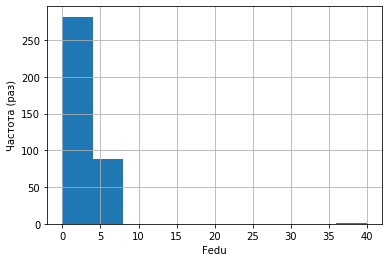

In [42]:
first_analysis('Fedu', boundaries=(0, 4))

Столбец  Mjob
          Mjob
other      133
services    98
at_home     58
teacher     55
health      32


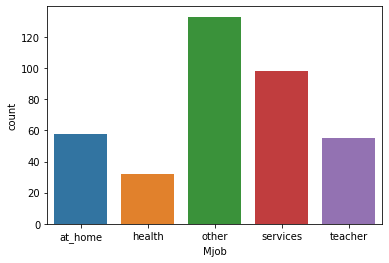

In [43]:
first_analysis('Mjob')

Столбец  Fjob
          Fjob
other      197
services   102
teacher     29
at_home     16
health      15


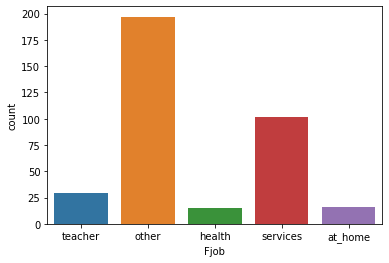

In [44]:
first_analysis('Fjob')

Столбец  reason
            reason
course         137
home           104
reputation     103
other           34


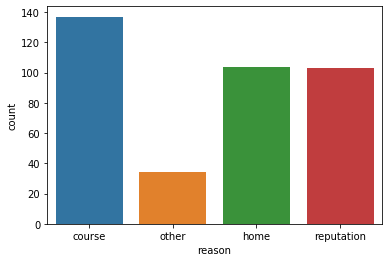

In [45]:
first_analysis('reason')

Столбец  guardian
        guardian
mother       250
father        86
other         28


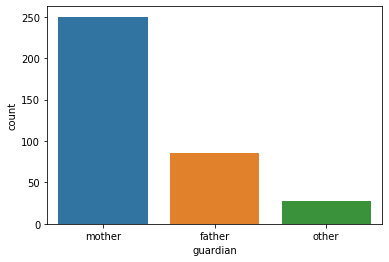

In [46]:
first_analysis('guardian')

Столбец  traveltime




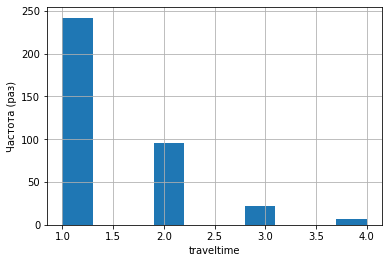

In [47]:
first_analysis('traveltime', boundaries=(1, 4))

Столбец  studytime




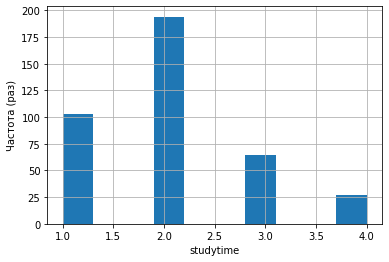

In [48]:
first_analysis('studytime', boundaries=(1, 4))

Столбец  failures




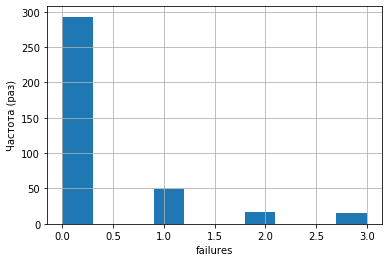

In [49]:
first_analysis('failures', boundaries=(0, 4))

Столбец  schoolsup
     schoolsup
no         335
yes         51


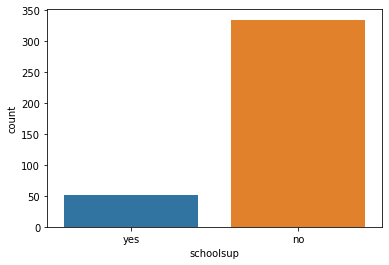

In [50]:
first_analysis('schoolsup')

Столбец  famsup
     famsup
yes     219
no      137


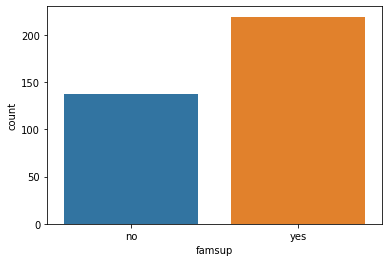

In [51]:
first_analysis('famsup')

Столбец  paid
     paid
no    200
yes   155


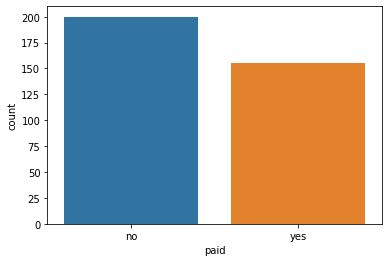

In [52]:
first_analysis('paid')

Столбец  activities
     activities
yes         195
no          186


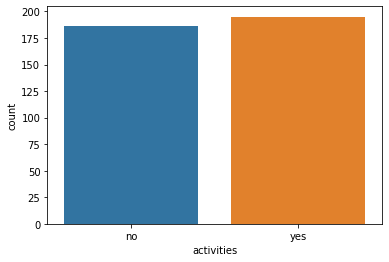

In [53]:
first_analysis('activities')

Столбец  nursery
     nursery
yes      300
no        79


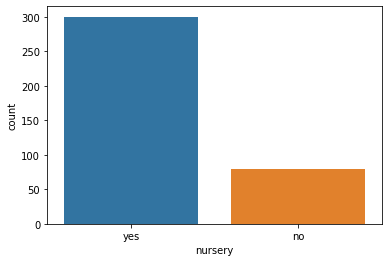

In [54]:
first_analysis('nursery')

Столбец  higher
     higher
yes     356
no       19


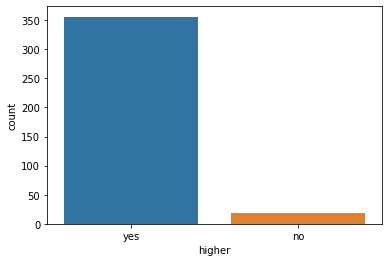

In [55]:
first_analysis('higher')

Столбец  internet
     internet
yes       305
no         56


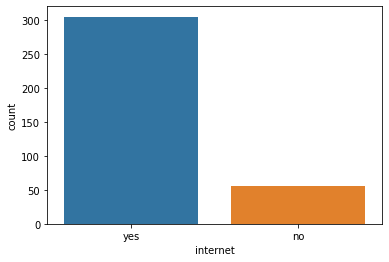

In [56]:
first_analysis('internet')

Столбец  romantic
     romantic
no        240
yes       124


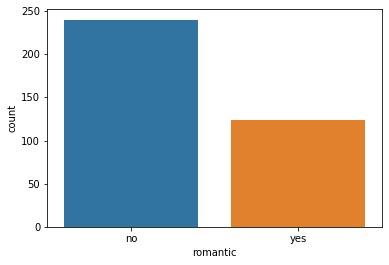

In [57]:
first_analysis('romantic')

Столбец  famrel


В столбце есть выборсы:


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
25,GP,F,16,U,GT3,None,2.0,2.0,services,services,home,mother,1.0,1.0,2.0,no,yes,yes,no,no,yes,yes,no,-1.0,2.0,2.0,5.0,14.0,40.0


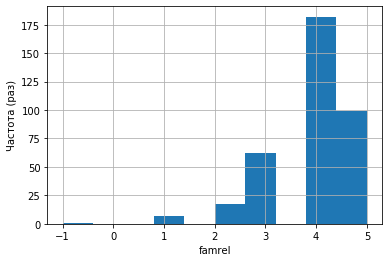

In [58]:
first_analysis('famrel', boundaries=(1, 5))

Столбец  freetime




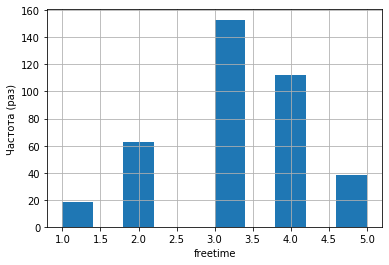

In [59]:
first_analysis('freetime', boundaries=(1, 5))

Столбец  goout




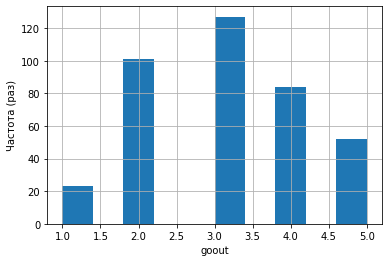

In [60]:
first_analysis('goout', boundaries=(1, 5))

Столбец  health




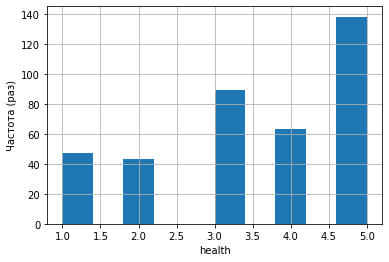

In [61]:
first_analysis('health', boundaries=(1, 5))

Столбец  absences




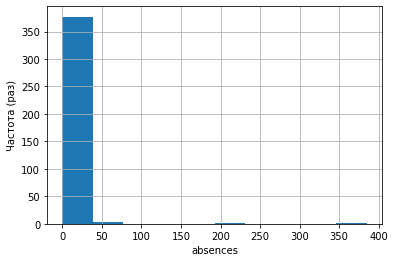

In [62]:
first_analysis('absences')

Столбец  score




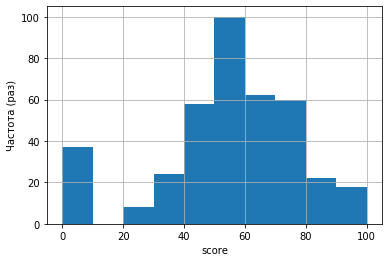

In [63]:
first_analysis('score', boundaries=(0, 100))

**В столбцах Fedu и farmel есть выбросы. Заменим их на более логичные значения:**

Столбец  Fedu




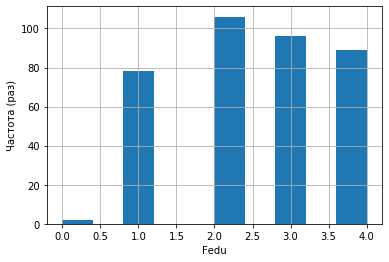

In [64]:
students['Fedu'] = students['Fedu'].apply(lambda x: 4 if x == 40 else x)
first_analysis('Fedu', boundaries=(0, 4))

Столбец  famrel




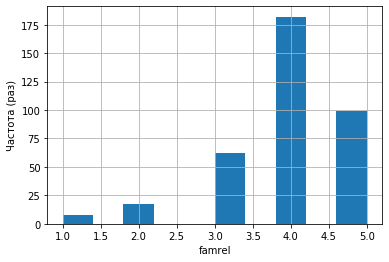

In [65]:
students['famrel'] = students['famrel'].apply(lambda x: 1 if x == -1 else x)
first_analysis('famrel', boundaries=(1, 5))

**В столбце absences есть два выброса. Предположим, что написано кол-во уроков вместо кол-ва дней. Поделим на предположительно среднее кол-во уроков**

25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].


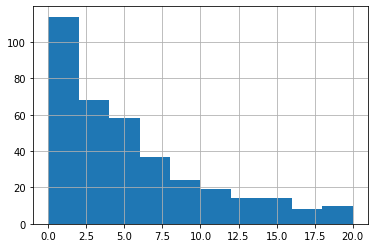

In [66]:
median = students.absences.median()
median
IQR = students.absences.quantile(0.75) - students.absences.quantile(0.25)
perc25 = students.absences.quantile(0.25)
perc75 = students.absences.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75)
      , "IQR: {}, ".format(IQR),"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
students.absences.loc[students.absences.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist()

**Границы выбросов не могут быть отрицательными. Оставим только те данные, где прогулов от 0 до 20**

In [67]:
students = students[students['absences'].between(0, 20)|pd.isnull(students.absences)]
print('В выборке осталось учеников: ', len(students))

В выборке осталось учеников:  378


Также остались значения NaN, их мы не удаляли:

In [68]:
print('Медиана: ', students.absences.median())
print('Среднее: ', students.absences.mean())

Медиана:  4.0
Среднее:  4.603825136612022


Заменим значения NaN на медиану, т.к. она ближе к основной части значений, чем среднее

In [69]:
students['absences'][pd.isnull(students.absences)] = 4.0
len(students)

378

## 3.Корреляционный анализ

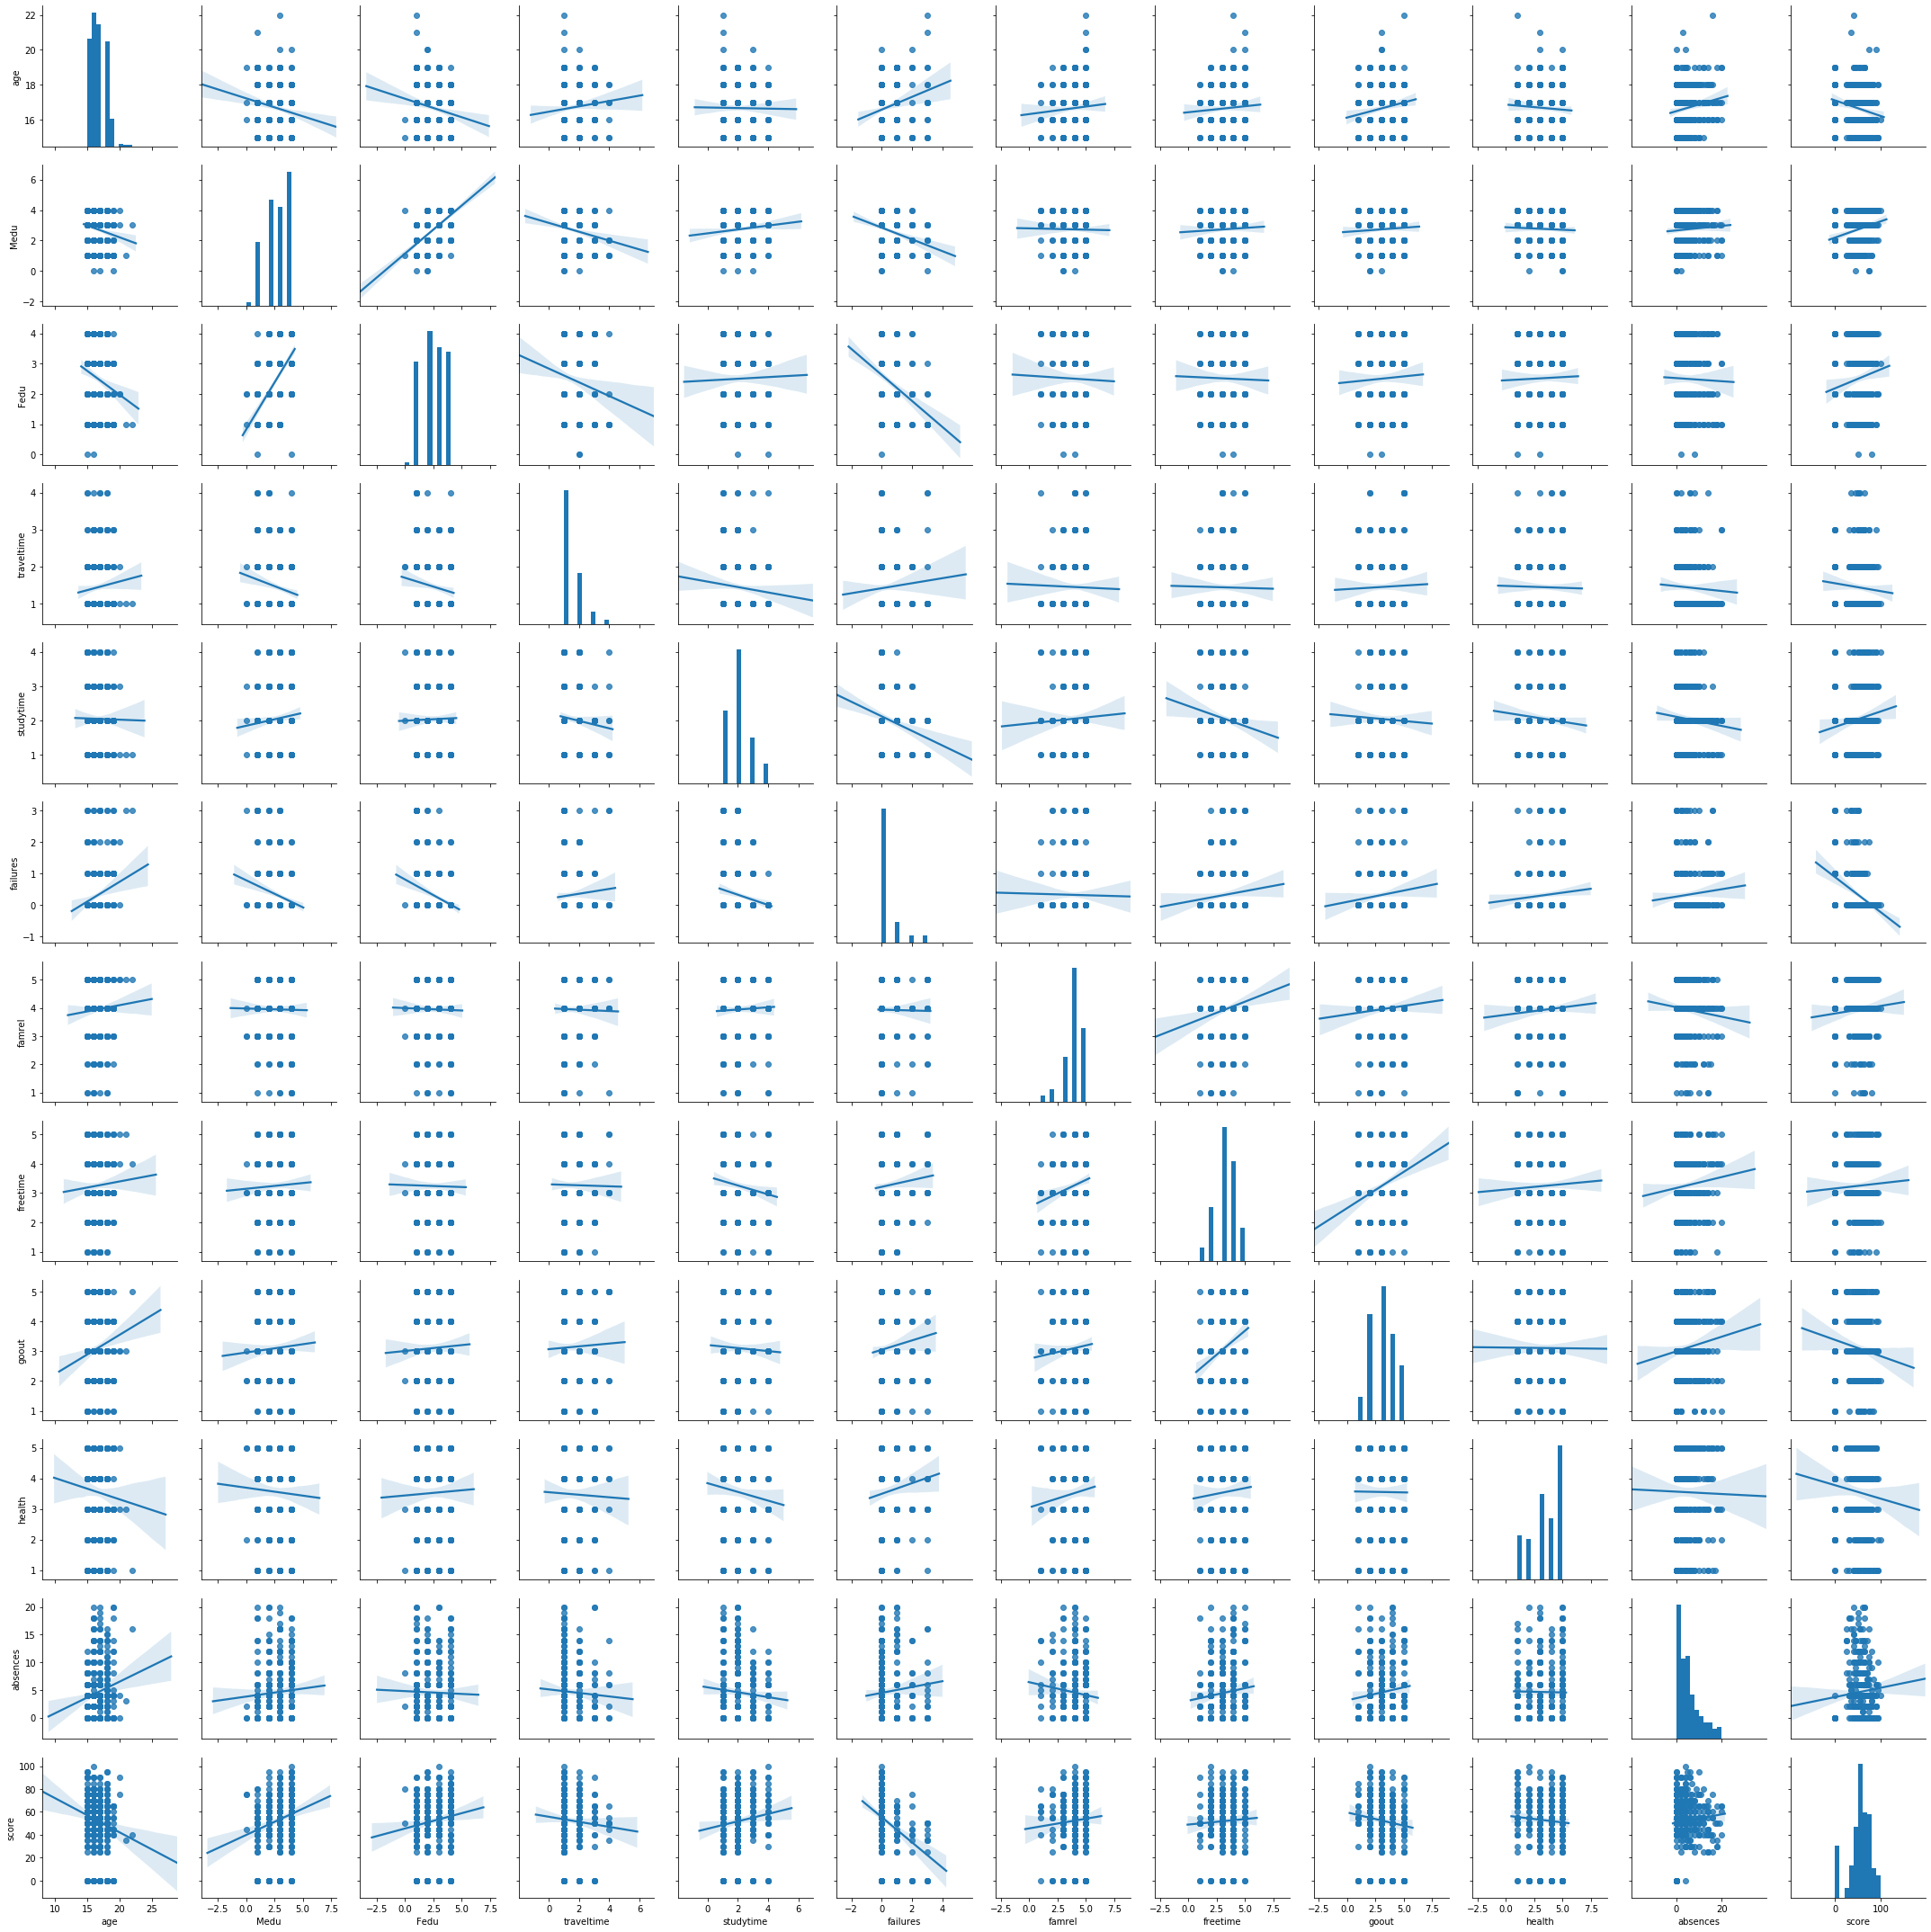

In [73]:
sns.pairplot(students, kind = 'reg')

In [71]:
students.corr()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,score
age,1.000000,-0.178986,-0.182478,0.084835,-0.010813,0.213530,0.061771,0.053455,0.150728,-0.063965,0.148437,-0.163081
Medu,-0.178986,1.000000,0.624821,-0.185128,0.097572,-0.256701,-0.013852,0.044221,0.054722,-0.041342,0.065394,0.220590
Fedu,-0.182478,0.624821,1.000000,-0.146594,0.021560,-0.290998,-0.020775,-0.015681,0.039009,0.026530,-0.022841,0.128802
traveltime,0.084835,-0.185128,-0.146594,1.000000,-0.089509,0.072128,-0.018966,-0.012145,0.029913,-0.020663,-0.045805,-0.068430
studytime,-0.010813,0.097572,0.021560,-0.089509,1.000000,-0.185313,0.037133,-0.133125,-0.039458,-0.086300,-0.076784,0.120591
failures,0.213530,-0.256701,-0.290998,0.072128,-0.185313,1.000000,-0.012432,0.087218,0.106159,0.092476,0.078313,-0.348271
famrel,0.061771,-0.013852,-0.020775,-0.018966,0.037133,-0.012432,1.000000,0.170666,0.073656,0.078428,-0.088510,0.067254
freetime,0.053455,0.044221,-0.015681,-0.012145,-0.133125,0.087218,0.170666,1.000000,0.281941,0.052142,0.091966,0.041174
goout,0.150728,0.054722,0.039009,0.029913,-0.039458,0.106159,0.073656,0.281941,1.000000,-0.005681,0.107236,-0.111971
health,-0.063965,-0.041342,0.026530,-0.020663,-0.086300,0.092476,0.078428,0.052142,-0.005681,1.000000,-0.013645,-0.072172


Наиболее сильно коррелирующие (>0.2) с баллом на экзамене столбцы это:
- **Medu**
- **failures**  
Причём корреляция разнонаправленная. Чем выше у матери образование, тем выше оценка ученика. И, наоборот, чем больше неудач наблюдалось у студента, тем хуже его оценка.

Также можно выделить несолько других признаков со значение коэффициента корреляции между 0.1 и 0.2:
- **age** (отрицательная корреляция)
- **studytime** (положительная корреляция)
- **Fedu** (положительная корреляция)
- **goout** (отрицательная корреляция)

## 4. Анализ номинативных переменных

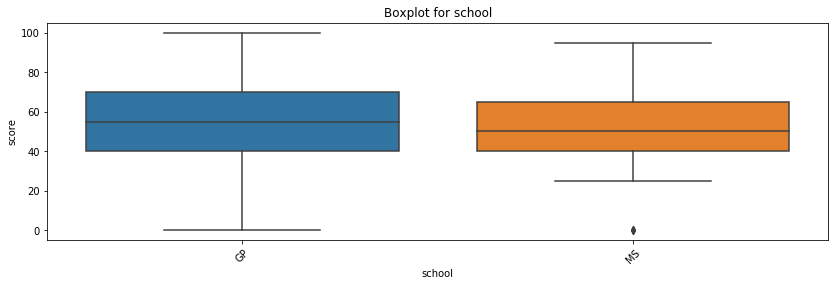

____________________________________________________________________________________________________



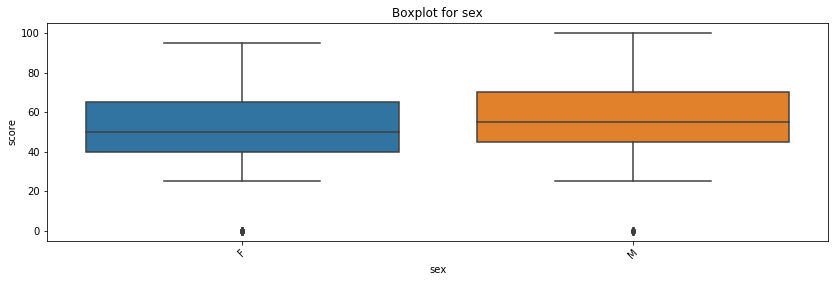

____________________________________________________________________________________________________



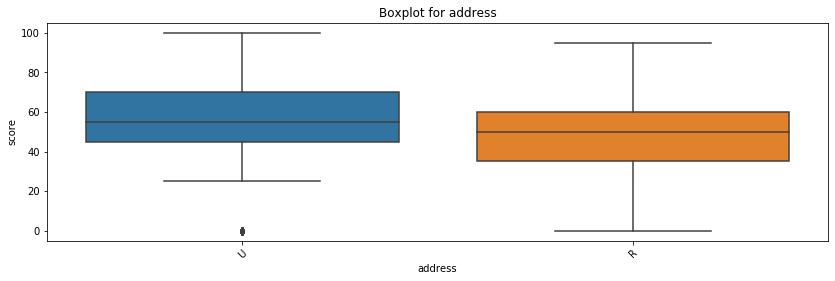

____________________________________________________________________________________________________



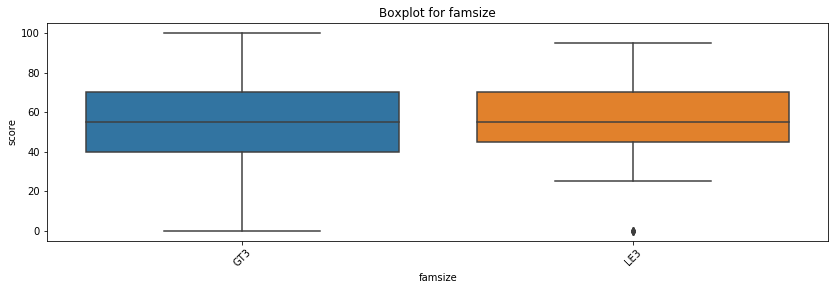

____________________________________________________________________________________________________



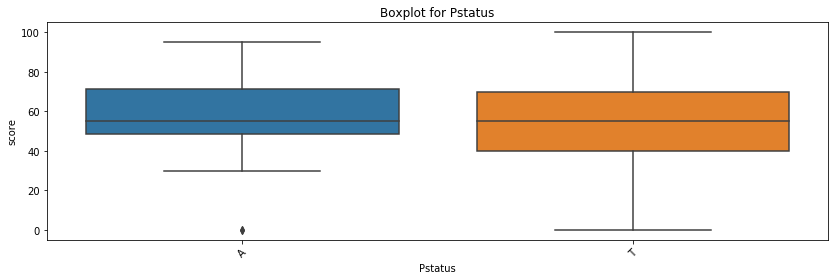

____________________________________________________________________________________________________



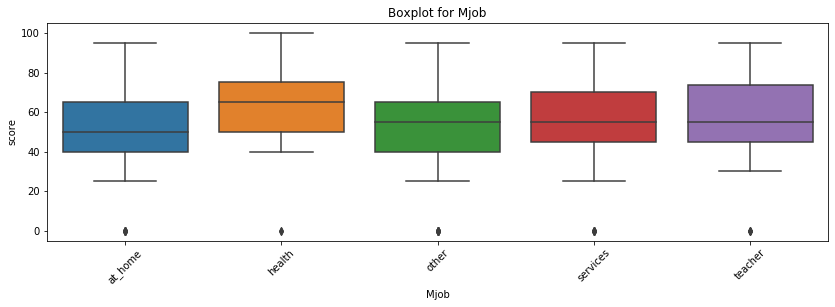

____________________________________________________________________________________________________



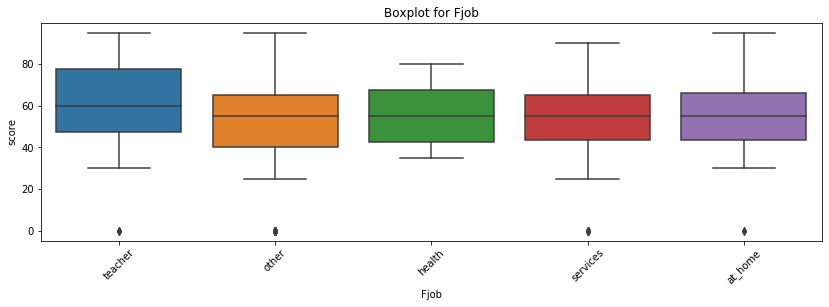

____________________________________________________________________________________________________



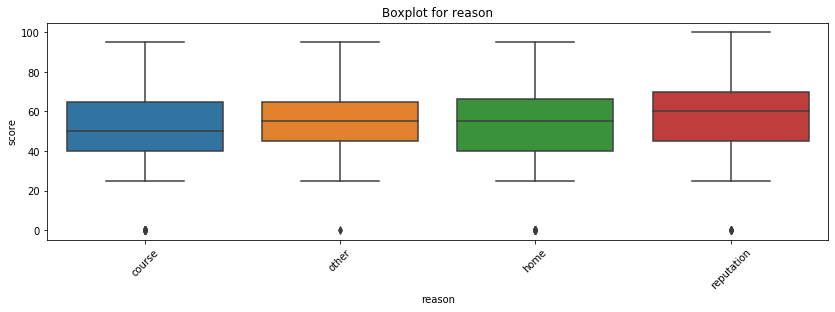

____________________________________________________________________________________________________



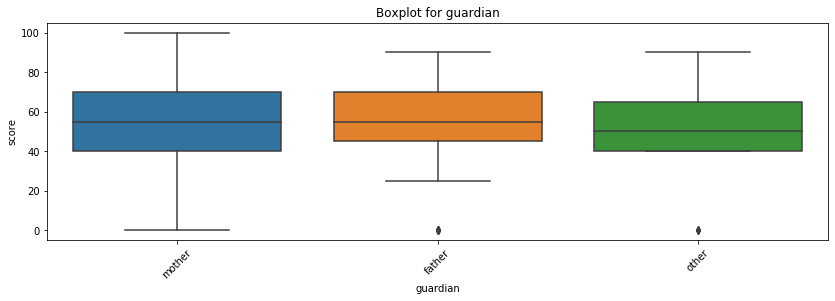

____________________________________________________________________________________________________



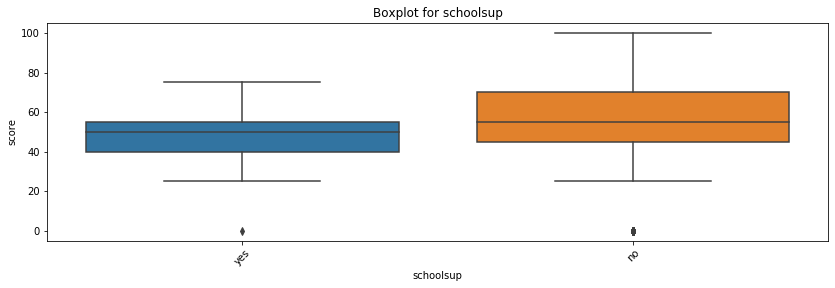

____________________________________________________________________________________________________



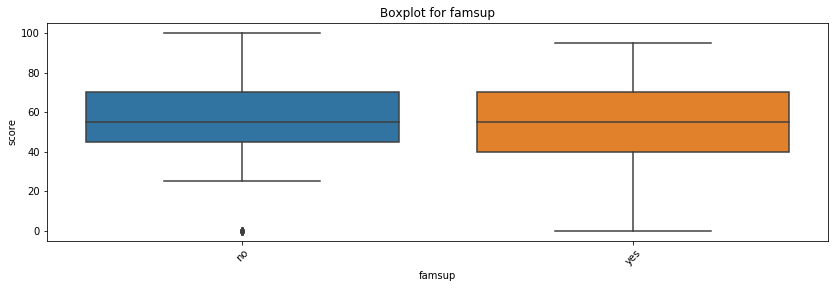

____________________________________________________________________________________________________



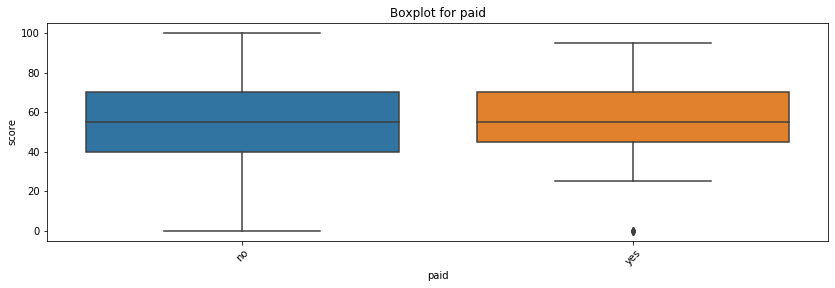

____________________________________________________________________________________________________



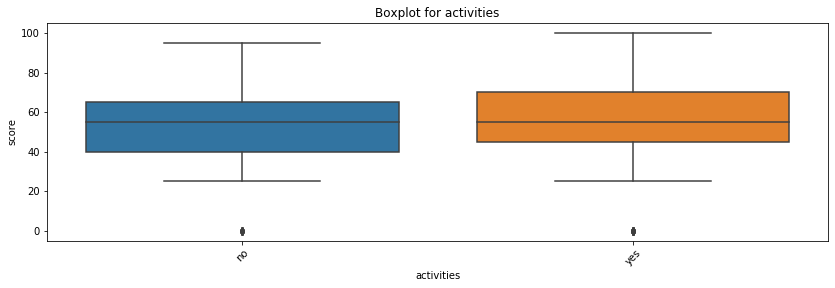

____________________________________________________________________________________________________



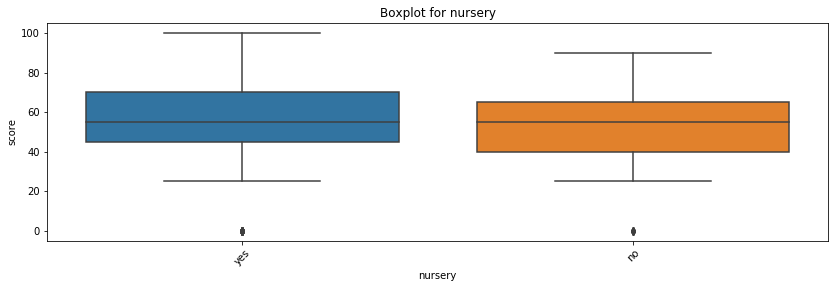

____________________________________________________________________________________________________



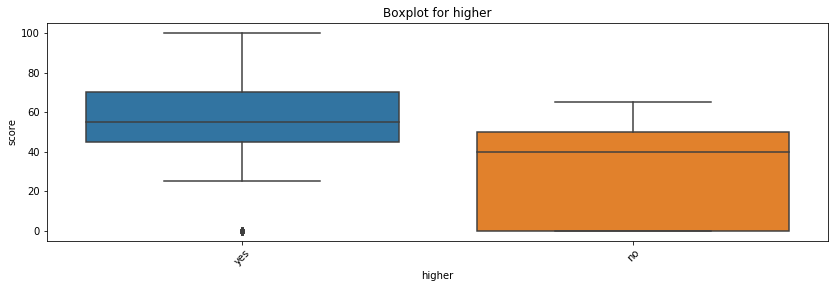

____________________________________________________________________________________________________



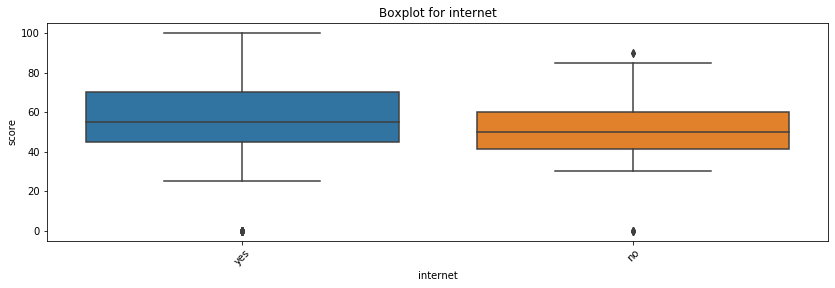

____________________________________________________________________________________________________



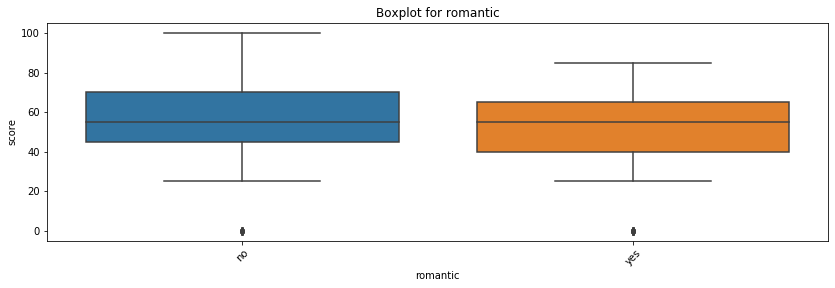

____________________________________________________________________________________________________



In [103]:
def nominative_analysis(dataframe, column):
    if dataframe[column].dtypes == 'object':
        fig, ax = plt.subplots(figsize = (14, 4))
        sns.boxplot(x=column, y='score', 
                    data=dataframe,
                   ax=ax)
        plt.xticks(rotation=45)
        ax.set_title('Boxplot for ' + column)
        plt.show()

        cols = dataframe.loc[:, column].value_counts()
        combinations_all = list(combinations(cols, 2))
        for comb in combinations_all:
            if ttest_ind(dataframe.loc[dataframe.loc[:, column] == comb[0], 'score'], 
                            dataframe.loc[dataframe.loc[:, column] == comb[1], 'score']).pvalue \
                <= 0.05/len(combinations_all):
                print('Найдены статистически значимые различия для колонки ', column)
                break
        print('_' * 100)
        print()
    
for col in ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian',
           'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']:
    nominative_analysis(students, col)

In [98]:
def get_stat_dif(dataframe, column, main_feature):
    cols = dataframe.loc[:, column].value_counts()
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(dataframe.loc[dataframe.loc[:, column] == comb[0], main_feature], 
                        dataframe.loc[dataframe.loc[:, column] == comb[1], main_feature]).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break
            
for col in ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian',
           'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']:
    print(col)
    get_stat_dif(students, col, 'score')
    print('\n')

school


sex


address


famsize


Pstatus


Mjob


Fjob


reason


guardian


schoolsup


famsup


paid


activities


nursery


higher


internet


romantic


